In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [129]:
df=pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [131]:
df.shape

(908, 13)

In [133]:
df.columns 

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [137]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [139]:
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

In [141]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [143]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.055826,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [145]:
df['cp'].value_counts()

cp
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: count, dtype: int64

In [147]:
df["sex"].value_counts()

sex
Male      718
Female    190
Name: count, dtype: int64

In [149]:
df['fbs'].value_counts()

fbs
False    723
True     185
Name: count, dtype: int64

In [151]:
df['restecg'].value_counts()

restecg
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: count, dtype: int64

In [153]:
df['slope'].value_counts()

slope
flat           453
upsloping      298
downsloping    157
Name: count, dtype: int64

In [155]:
df['thal'].value_counts()

thal
normal               386
reversable defect    346
fixed defect         176
Name: count, dtype: int64

In [157]:
df['exang'].value_counts()

exang
False    516
True     337
TURE      36
FALSE     19
Name: count, dtype: int64

In [159]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['cp']=le.fit_transform(df["cp"])
df['sex']=le.fit_transform(df["sex"])
df['fbs']=le.fit_transform(df["fbs"])
df['restecg']=le.fit_transform(df["restecg"])
df['slope']=le.fit_transform(df["slope"])
df['thal']=le.fit_transform(df["thal"])
#df['exang']=le.fit_transform(df["exang"])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,False,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,False,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,False,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,False,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,True,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,False,1.500000,2,2,4
904,62,1,0,166,170,0,2,120,True,3.000000,1,2,4
905,56,1,2,170,0,0,0,123,True,2.500000,0,1,4
906,56,1,2,144,208,1,2,105,TURE,0.891253,0,0,4


In [169]:
# One hot Encoding
df['exang']=le.fit_transform(df["exang"])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,2,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,2,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,2,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,2,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,2,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,2,1.500000,2,2,4
904,62,1,0,166,170,0,2,120,2,3.000000,1,2,4
905,56,1,2,170,0,0,0,123,2,2.500000,0,1,4
906,56,1,2,144,208,1,2,105,0,0.891253,0,0,4


In [171]:
df["exang"].value_counts()

exang
2    853
0     36
1     19
Name: count, dtype: int64

In [173]:
x=df.iloc[:,0:11]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope
0,63,1,3,145,233,1,0,150,2,2.300000,0
1,41,1,1,135,203,0,1,132,2,0.000000,1
2,57,1,0,140,192,0,1,148,2,0.400000,1
3,52,1,3,118,186,0,0,190,2,0.000000,1
4,57,1,0,110,201,0,1,126,2,1.500000,1
...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,2,1.500000,2
904,62,1,0,166,170,0,2,120,2,3.000000,1
905,56,1,2,170,0,0,0,123,2,2.500000,0
906,56,1,2,144,208,1,2,105,0,0.891253,0


In [175]:
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

In [177]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 1.00602683e+00,  5.14416131e-01,  2.32027607e+00, ...,
         2.43448690e-01,  1.33499581e+00, -1.67276970e+00],
       [-1.39756029e+00,  5.14416131e-01,  2.32257565e-01, ...,
         2.43448690e-01, -8.44593758e-01, -2.24843210e-01],
       [ 3.50503068e-01,  5.14416131e-01, -8.11751686e-01, ...,
         2.43448690e-01, -4.65534703e-01, -2.24843210e-01],
       ...,
       [ 2.41249108e-01,  5.14416131e-01,  1.27626682e+00, ...,
         2.43448690e-01,  1.52452534e+00, -1.67276970e+00],
       [ 2.41249108e-01,  5.14416131e-01,  1.27626682e+00, ...,
        -4.61482406e+00, -1.05210023e-16, -1.67276970e+00],
       [ 3.50503068e-01,  5.14416131e-01, -8.11751686e-01, ...,
        -2.18568769e+00, -1.05210023e-16, -2.24843210e-01]])

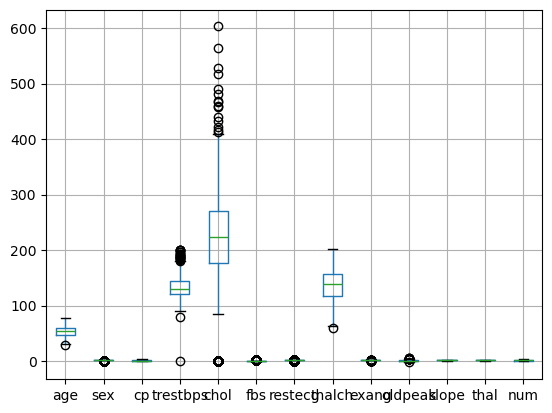

In [183]:
df.boxplot()
plt.show()

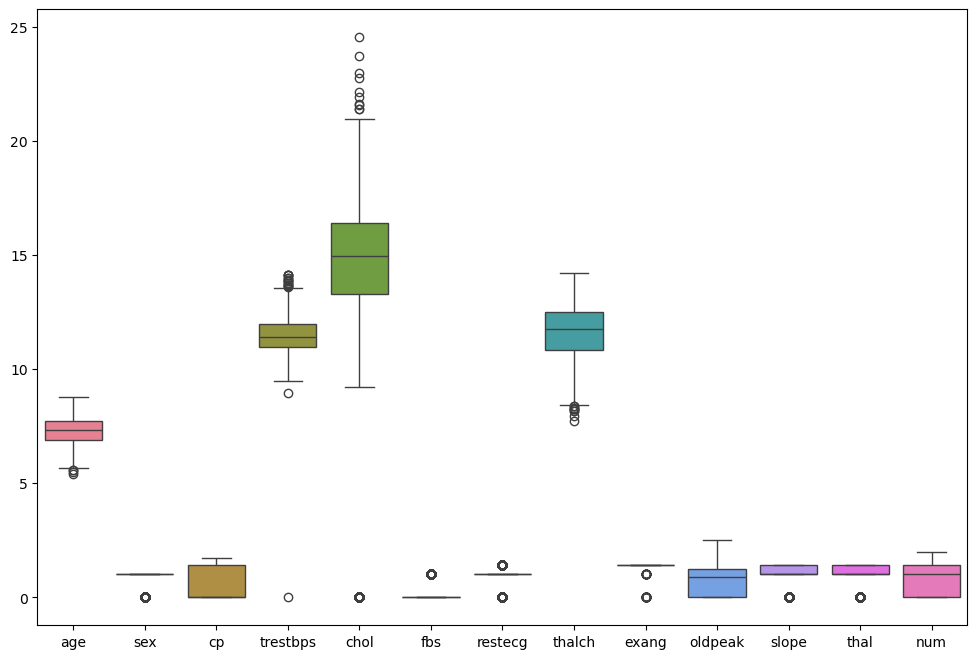

In [189]:
plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(df))
plt.show()

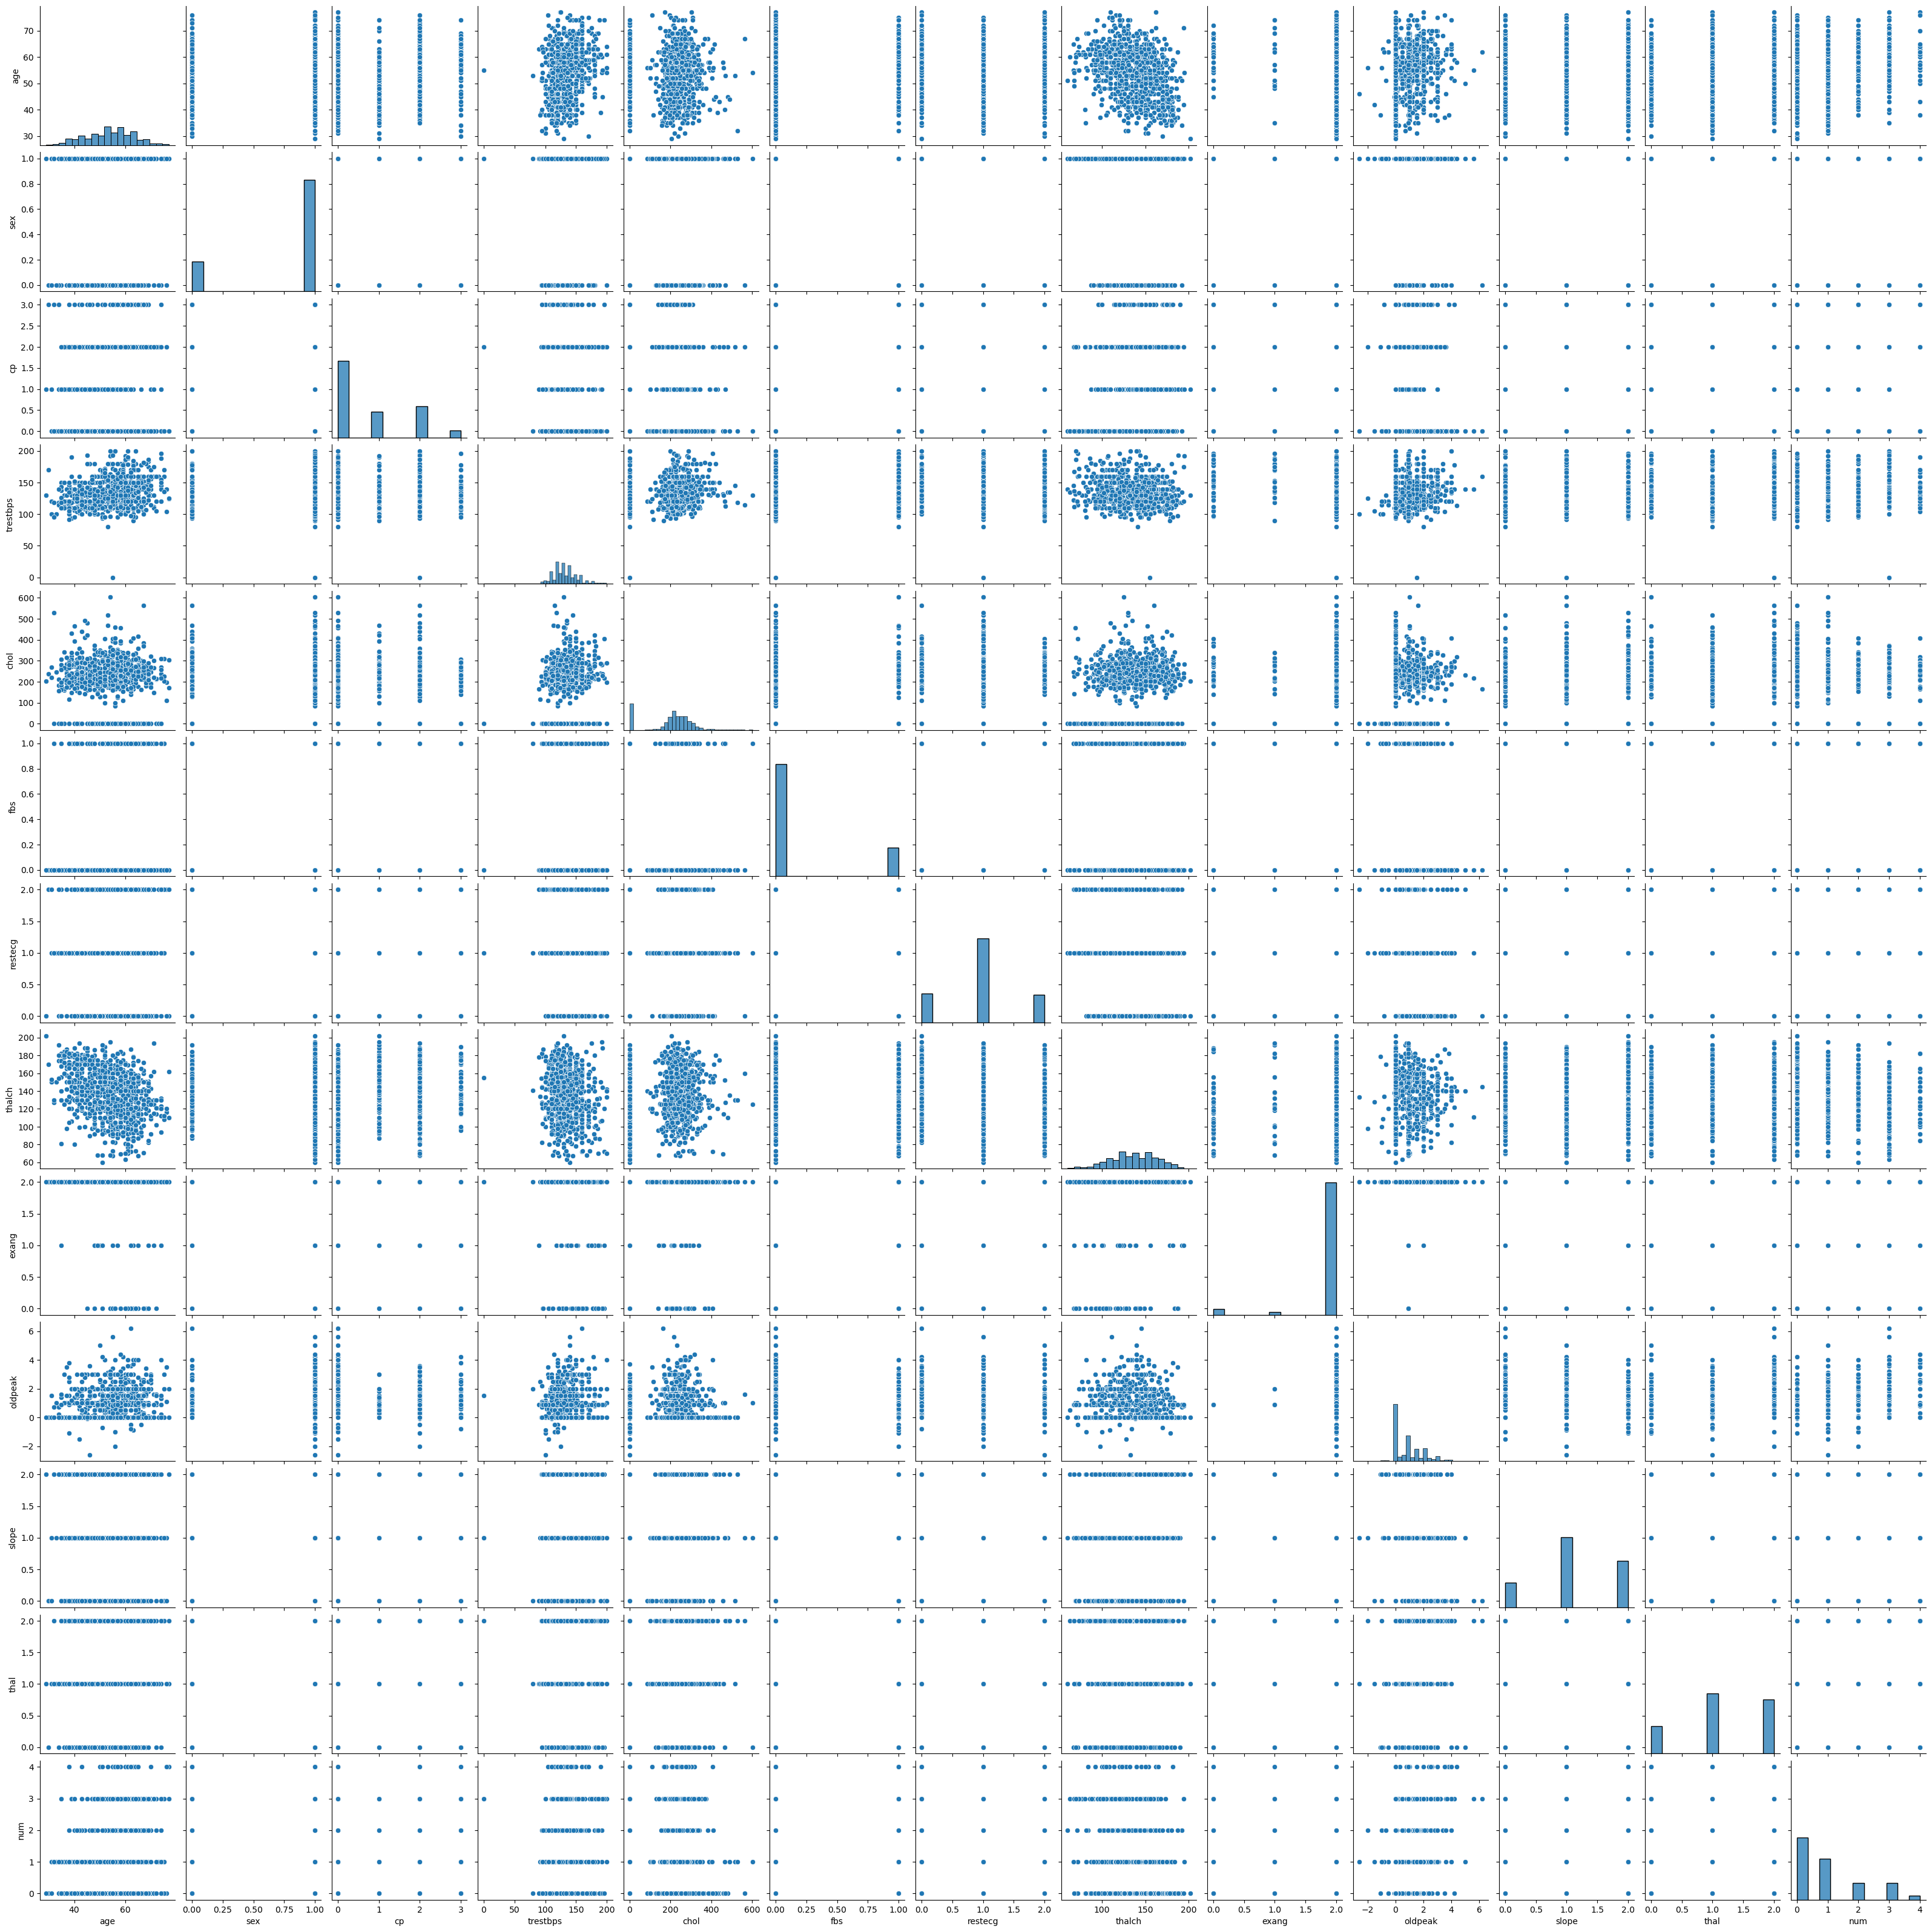

In [193]:
sns.pairplot(df)
plt.show()

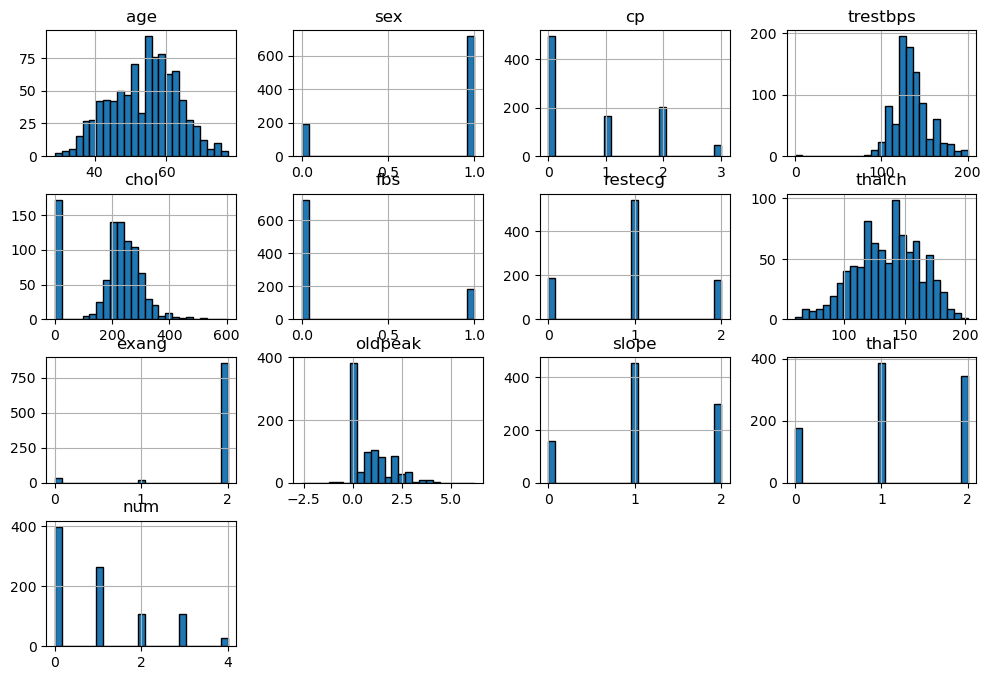

In [211]:
df.hist(figsize=(12,8),bins=25,edgecolor="Black")
plt.show()

In [213]:
correlation=df.corr(numeric_only=True)
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,0.052194,-0.067589,0.253999,-0.099967,0.176702,-0.007518,-0.328088,-0.151970,0.232718,-0.054644,0.058691,0.326493
sex,0.052194,1.000000,-0.125130,0.016441,-0.191513,0.092167,0.078158,-0.178794,-0.105504,0.101209,-0.045065,0.068439,0.259605
cp,-0.067589,-0.125130,1.000000,0.009078,0.071160,-0.045228,-0.072048,0.248211,-0.045371,-0.170467,0.092177,-0.080093,-0.312848
trestbps,0.253999,0.016441,0.009078,1.000000,0.117488,0.111614,0.058148,-0.133360,-0.190087,0.152162,0.006748,0.056369,0.137251
chol,-0.099967,-0.191513,0.071160,0.117488,1.000000,-0.113721,-0.194473,0.197907,-0.004773,0.028744,0.047292,-0.016943,-0.238813
fbs,0.176702,0.092167,-0.045228,0.111614,-0.113721,1.000000,0.067320,-0.065428,-0.115964,0.022756,-0.026636,-0.017255,0.156268
restecg,-0.007518,0.078158,-0.072048,0.058148,-0.194473,0.067320,1.000000,-0.195198,-0.167731,-0.031561,-0.084796,-0.112161,0.036508
thalch,-0.328088,-0.178794,0.248211,-0.133360,0.197907,-0.065428,-0.195198,1.000000,0.177460,-0.128728,0.224048,0.006171,-0.323058
exang,-0.151970,-0.105504,-0.045371,-0.190087,-0.004773,-0.115964,-0.167731,0.177460,1.000000,-0.002811,0.012128,0.036548,-0.068292
oldpeak,0.232718,0.101209,-0.170467,0.152162,0.028744,0.022756,-0.031561,-0.128728,-0.002811,1.000000,-0.184895,0.090557,0.416580


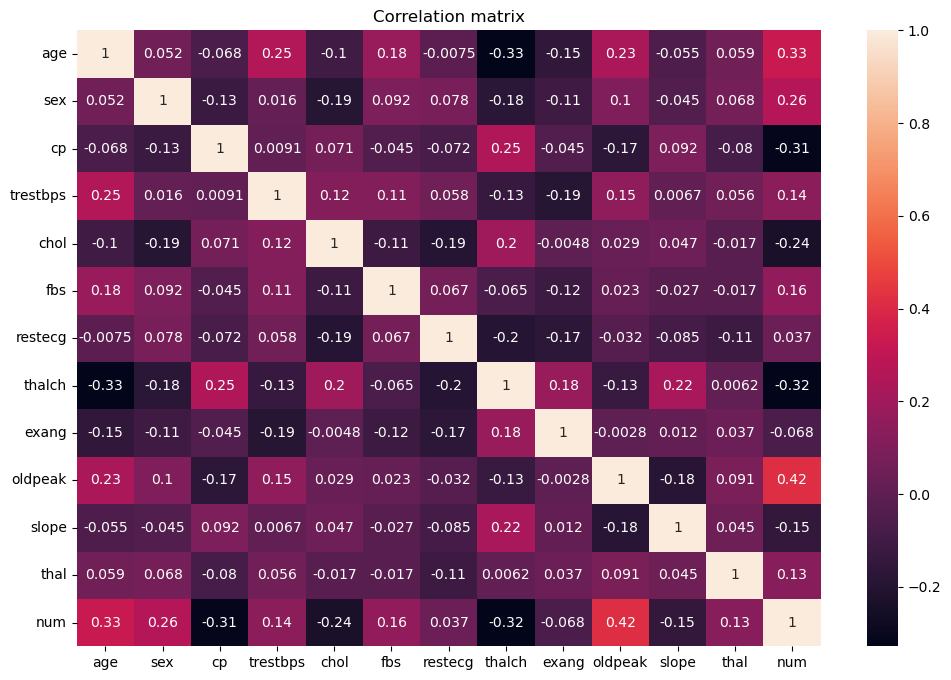

In [247]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation, annot=True)
plt.title("Correlation matrix")
plt.show()

In [249]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [251]:
from sklearn import  tree
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x,y)

DecisionTreeClassifier()

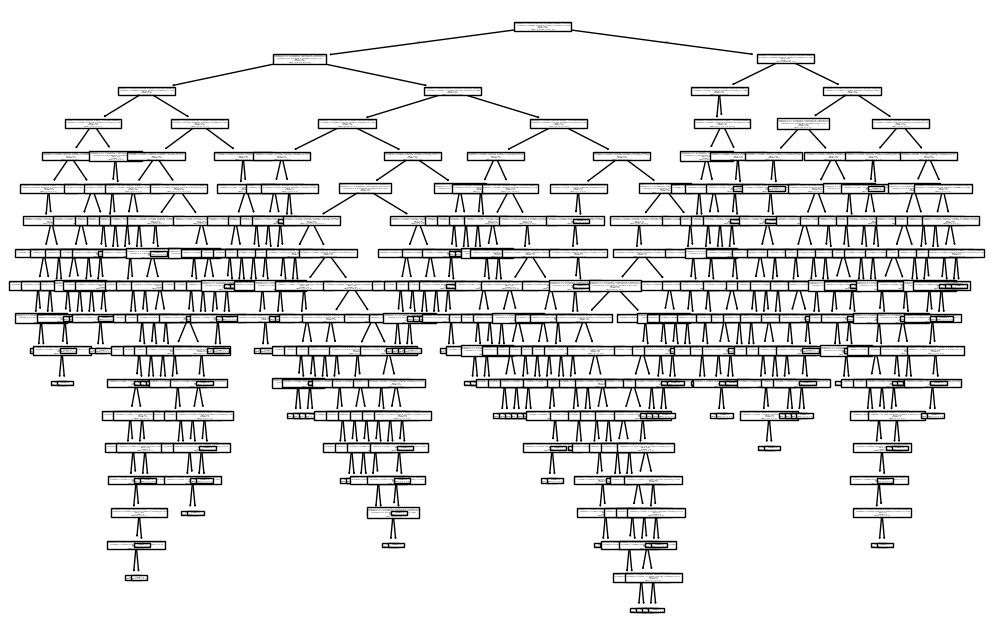

In [271]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dtree,feature_names=x)
plt.show()

In [254]:
y_pred=dtree.predict(x_test)
y_pred

array([3, 1, 0, 2, 3, 3, 1, 0, 4, 2, 1, 4, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 3, 1, 3, 0, 2, 1, 0, 0,
       4, 1, 4, 0, 1, 3, 1, 2, 0, 1, 3, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 0, 2, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 2, 1, 3, 1,
       0, 0, 0, 2, 0, 3, 1, 1, 4, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 2, 0, 3, 0, 0, 0, 1, 1, 3, 0, 4, 0, 1, 0, 0, 2,
       1, 1, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 1, 0, 0, 1, 1, 0, 2, 0, 2,
       2, 1, 3, 1, 3, 0], dtype=int64)

In [255]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))

1.0


In [256]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[89,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0],
       [ 0,  0, 22,  0,  0],
       [ 0,  0,  0, 17,  0],
       [ 0,  0,  0,  0,  6]], dtype=int64)

In [257]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         6

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



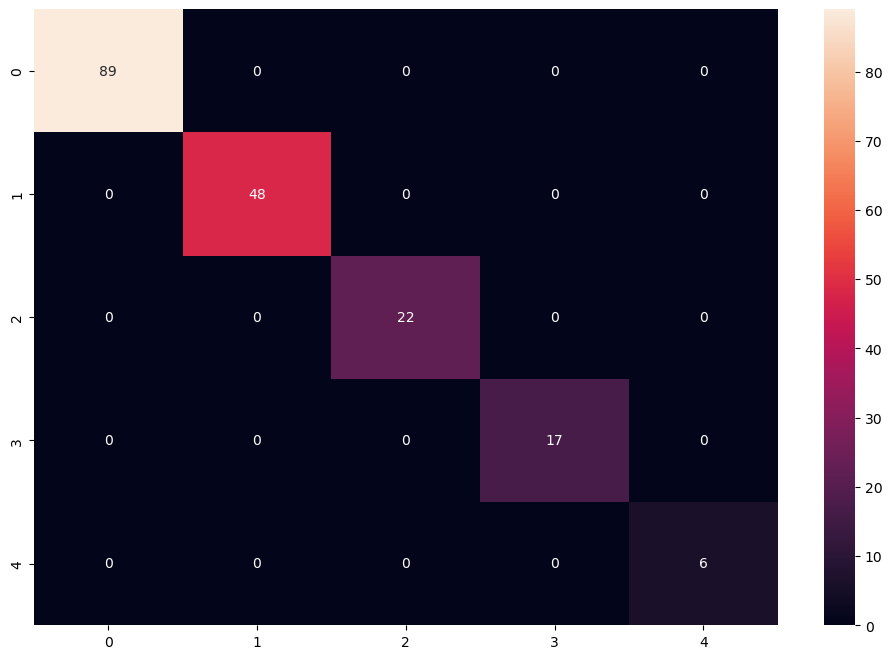

In [258]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(cm,annot=True)
plt.show()

# Interview Questions: